In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl

# Load datasets (replace with your actual file paths)
production_df = pd.read_excel('data\observatory_production_aggregated.xlsx')
demand_df = pd.read_excel('data\observatory_demand_aggregated.xlsx')
research_df = pd.read_csv('new_data\location_hydrogeneuroperesearch_summary.csv')
patents_df = pd.read_csv('data\locations_patent_data.csv')
fueling_stations_df = pd.read_csv('data\location_hydrogen_fuelling_stations.csv')
production_costs_df = pd.read_excel('data\observatory_production_cost.xlsx')
vehicels_df = pd.read_excel('data\observatory_hydrogen_vehicel.xlsx')
population_df = pd.read_excel('data\european_population.xlsx')
workers_df = pd.read_csv('data\location_amadeus_mitarbeiter.csv')
companies_df = pd.read_excel('data\location_industry_full_set.xlsx')
valley_df = pd.read_excel('data\location_valleys.xlsx')

# Inspect Data

Datasets need to be aggregated to country level so that I can actually compare them with each other

# Adapt valley

In [2]:
#count value count main location
valley_df['Main location'].value_counts()

#create a new df with the main location and the number of companies
valley_count = valley_df['Main location'].value_counts().reset_index()
valley_count.columns = ['Country', 'Number of Valleys']
print(valley_count)

#save the df to a csv file
valley_count.to_csv('new_data/valley_count.csv')

           Country  Number of Valleys
0          Germany                 16
1            Spain                  7
2      Netherlands                  6
3         Portugal                  5
4    United States                  4
5            Italy                  4
6           France                  4
7   United Kingdom                  4
8        Australia                  4
9          Denmark                  3
10          Norway                  3
11          Greece                  3
12           China                  3
13          Brazil                  3
14         Ukraine                  2
15         Belgium                  2
16         Finland                  2
17         Romania                  2
18           Chile                  2
19          Poland                  2
20         Austria                  2
21          Sweden                  1
22          Turkey                  1
23         Ireland                  1
24        Thailand                  1
25        Sl

# Adapt population

In [3]:
# Only include the columns TIME and 2023
population_df = population_df[['TIME', '2023']]

#change TIME to Country
population_df = population_df.rename(columns={'TIME': 'Country'})
# Convert the '2023' column to numeric
population_df['2023'] = pd.to_numeric(population_df['2023'], errors='coerce')

# Calculate per million
population_df['per_million'] = population_df['2023'] / 1000000

# Exclude NaN values
population_df = population_df.dropna()

# Display the final DataFrame
print(population_df)

#new csv file
population_df.to_csv('new_data\population_per_million.csv', index=False)

            Country        2023  per_million
0           Belgium  11742796.0    11.742796
1          Bulgaria   6447710.0     6.447710
2           Czechia  10827529.0    10.827529
3           Denmark   5932654.0     5.932654
4           Germany  84358845.0    84.358845
5           Estonia   1365884.0     1.365884
6           Ireland   5271395.0     5.271395
7            Greece  10413982.0    10.413982
8             Spain  48085361.0    48.085361
9            France  68172977.0    68.172977
10          Croatia   3850894.0     3.850894
11            Italy  58997201.0    58.997201
12           Cyprus    920701.0     0.920701
13           Latvia   1883008.0     1.883008
14        Lithuania   2857279.0     2.857279
15       Luxembourg    660809.0     0.660809
16          Hungary   9599744.0     9.599744
17            Malta    542051.0     0.542051
18      Netherlands  17811291.0    17.811291
19          Austria   9104772.0     9.104772
20           Poland  36753736.0    36.753736
21        

# Adapt worker per country

Generell Information: Number of workers is highly unreliable, thus we did not include it into the caulculation for anything in the cluster analysis. It can give a glimpse into the importance, but it is not to be considered a good indicator so far in this dataset

In [4]:
workers_df['Worker'] = workers_df["Anzahl der Mitarbeiter \r\nLetztes verf. Jahr"]

#drop the column Anzahl der Mitarbeiter \r\nLetztes verf. Jahr
workers_df = workers_df.drop(columns=['Anzahl der Mitarbeiter \r\nLetztes verf. Jahr'])

# Convert 'Worker' to numeric, setting errors='coerce' to convert 'n.v.' to NaN
workers_df['Worker'] = pd.to_numeric(workers_df['Worker'], errors='coerce')

# Fill NaN values with 0
workers_df['Worker'] = workers_df['Worker'].fillna(0)

# Group by 'Country' and sum the 'Worker' column
worker_sum = workers_df.groupby('Country')['Worker'].sum().reset_index()

print(worker_sum)

            Country   Worker
0           Albania      0.0
1           Austria   1599.0
2           Belarus    447.0
3           Belgium  26342.0
4          Bulgaria   1049.0
5           Croatia    355.0
6            Cyprus      0.0
7    Czech Republic   1957.0
8           Denmark   3232.0
9           Estonia      0.0
10          Finland   3113.0
11           France  84110.0
12          Germany  45192.0
13           Greece    442.0
14          Hungary     91.0
15          Iceland     29.0
16          Ireland    307.0
17            Italy  12908.0
18        Lithuania     16.0
19       Luxembourg      0.0
20            Malta      0.0
21      Netherlands   8382.0
22  North Macedonia     24.0
23           Norway   1654.0
24           Poland   7652.0
25         Portugal    459.0
26          Romania    513.0
27           Russia  18434.0
28           Serbia    378.0
29         Slovakia    153.0
30         Slovenia   2040.0
31            Spain   5645.0
32           Sweden   2971.0
33      Switze

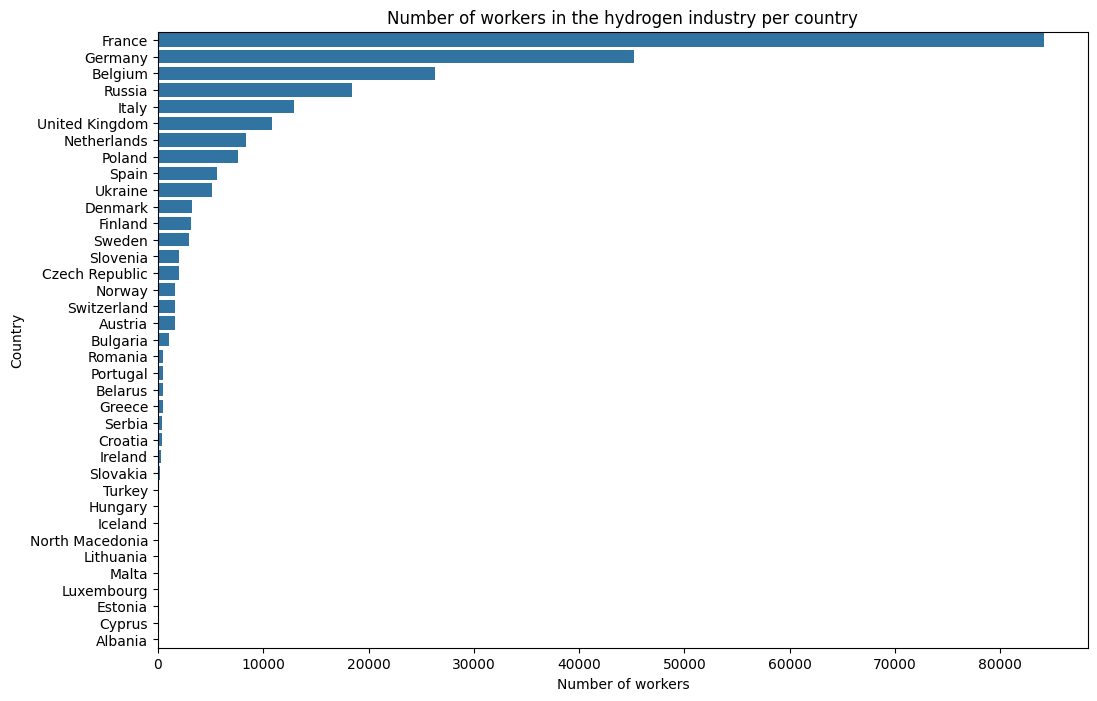

In [5]:
#order the countries by the number of workers
worker_sum = worker_sum.sort_values(by='Worker', ascending=False)

#create a plot of the number of workers in the hydrogen industry per country
plt.figure(figsize=(12, 8))
sns.barplot(data=worker_sum, x='Worker', y='Country')
plt.title('Number of workers in the hydrogen industry per country')
plt.xlabel('Number of workers')
plt.ylabel('Country')
plt.show()

#new csv file
worker_sum.to_csv('new_data\workers_per_country.csv', index=False)


In [6]:
worker_sum

,Country,Worker
11,France,84110.0
12,Germany,45192.0
3,Belgium,26342.0
27,Russia,18434.0
17,Italy,12908.0
36,United Kingdom,10847.0
21,Netherlands,8382.0
24,Poland,7652.0
31,Spain,5645.0
35,Ukraine,5178.0


In [7]:
companies_df

,Lat,Lon,Name,Full Address,Address,ZIP,City,Country
0,50.299470,8.271285,"""GERMAN ASSOCIATION FOR GAS TECHNOLOGY"" E.V.","WEIßERDSTR., 65520, Limburg-Weilburg, Deutschland",WEIßERDSTR.,65520,BAD CAMBERG,Germany
1,47.487849,12.078639,"""INTERCHIM AUSTRIA"" INTERNATIONALER CHEMIEHAND...","BRIXENTALERSTRAßE 67, 6300, Tirol, Österreich",BRIXENTALERSTRAßE 67,6300,WÖRGL,Austria
2,36.339571,28.204710,(SOLMAR),"A VIPE 0 IRAKLIOU, NEA ALIKARNASSOS, HERAKLION...",NaN,NaN,NaN,Greece
3,38.728847,-9.143946,"1s1 Energy Portugal, Unipessoal, Lda","Av. Duque de Loulé 5 6ºC, Lisbon, 1050-085, Po...",NaN,NaN,NaN,Portugal
4,53.350566,-2.664956,2G Energy,"Unit 1 Sycamore Ct, Warrington Rd, Runcorn WA7...",NaN,NaN,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
3963,38.199859,25.927260,ΟΞΕΑ ΕΜΠΟΡΙΑ ΧΗΜΙΚΩΝ ΠΡΟΙΟΝΤΩΝ Ε.Π.Ε.,"ΛΕΩΦ. ΓΕΝΝΗΜΑΤΆ, ΘΈΣΗ ΧΆΒΩΣΙ, 19018, Αττική, G...","ΛΕΩΦ. ΓΕΝΝΗΜΑΤΆ, ΘΈΣΗ ΧΆΒΩΣΙ",19018,ΜΑΓΟΎΛΑ,Greece
3964,42.661999,23.415658,МЕСЕР БЪЛГАРИЯ,"КВ. ГАРА ИСКЪР, УЛ. ДИМИТЪР ПЕШЕВ 3А, 1528, Со...","КВ. ГАРА ИСКЪР, УЛ. ДИМИТЪР ПЕШЕВ 3А",1528,СОФИЯ,Bulgaria
3965,42.691527,23.353074,ШЕЛ БЪЛГАРИЯ,"СЕРДИКА ОФИСИ, БУЛ. СИТНЯКОВО 48, ЕТ. 8, 1505,...","СЕРДИКА ОФИСИ, БУЛ. СИТНЯКОВО 48, ЕТ. 8",1505,СОФИЯ,Bulgaria
3966,44.497078,11.353020,NaN,"Via Zamboni 33, 40126 Bologna, Emilia-Romagna ...",NaN,NaN,NaN,Italy


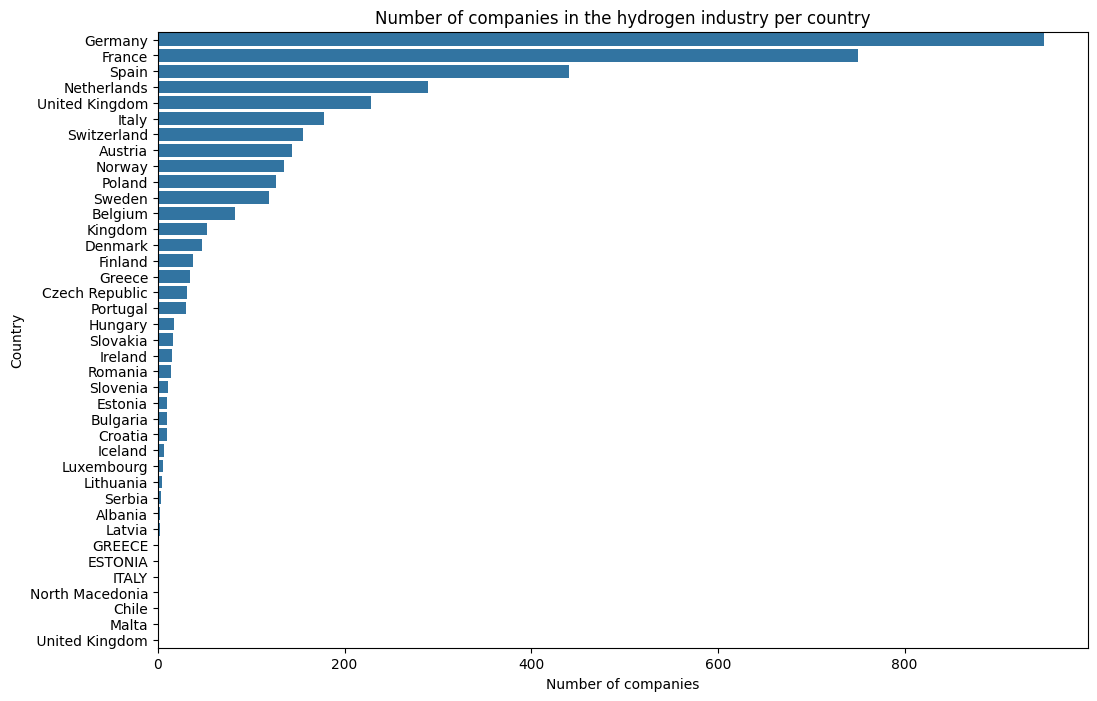

In [8]:
#count the number of times countries appear in the dataset
companies_df['Country'].value_counts()

#group by 'Country' and count the number of companies
company_count = companies_df.groupby('Country')['Name'].count().reset_index()

#change Name to Number of Companies
company_count = company_count.rename(columns={'Name': 'Number of Companies'})

#sort the values by the number of companies

company_count = company_count.sort_values(by='Number of Companies', ascending=False)

#create a plot of the number of companies in the hydrogen industry per country

plt.figure(figsize=(12, 8))
sns.barplot(data=company_count, x='Number of Companies', y='Country')
plt.title('Number of companies in the hydrogen industry per country')
plt.xlabel('Number of companies')
plt.ylabel('Country')

#new csv file
company_count.to_csv('new_data\companies_per_country.csv', index=False)

In [9]:
company_count

,Country,Number of Companies
14,Germany,949
12,France,750
35,Spain,441
26,Netherlands,289
38,United Kingdom,228
20,Italy,178
37,Switzerland,156
2,Austria,144
28,Norway,135
29,Poland,126


# Cleaning Fuelling stations

In [10]:
import pandas as pd
country_mapping = {
    'Deutschland': 'Germany',
    'Frankreich': 'France',
    'Niederlande': 'Netherlands',
    'Schweiz': 'Switzerland',
    'Belgien': 'Belgium',
    'Dänemark': 'Denmark',
    'Tschechien': 'Czech Republic',
    'Polen': 'Poland',
    'Luxemburg': 'Luxembourg',
    'Germany': 'Germany',  # Add this line to ensure the original names are also mapped
    'France': 'France',    # Add this line
    'Netherlands': 'Netherlands',  # Add this line
    'Switzerland': 'Switzerland',  # Add this line
    'Belgium': 'Belgium',  # Add this line
    'Denmark': 'Denmark',  # Add this line
    'Czech Republic': 'Czech Republic',  # Add this line
    'Poland': 'Poland',    # Add this line
    'Luxembourg': 'Luxembourg'   # Add this line
}

# Replace German country names with English equivalents
fueling_stations_df['Country'] = fueling_stations_df['Country'].replace(country_mapping)

# Summarize the number of rows per country
print(fueling_stations_df["Country"].value_counts())
#create a new file with the number of rows per country and name the columns "Country" and "Number Stations"
fueling_stations_df["Country"].value_counts().reset_index().rename(columns={"Country":"Country", "count":"Number Stations"}).to_csv("new_data/fueling_stations_per_country.csv", index=False)

fueling_stations_df = pd.read_csv('new_data/fueling_stations_per_country.csv')
fueling_stations_df

Country
Germany           98
France            30
Netherlands       22
Switzerland       12
United Kingdom     9
Belgium            9
Denmark            6
Austria            5
Norway             4
Sweden             4
Spain              3
Czech Republic     2
Poland             2
Italy              1
Iceland            1
Luxembourg         1
Name: count, dtype: int64


,Country,Number Stations
0,Germany,98
1,France,30
2,Netherlands,22
3,Switzerland,12
4,United Kingdom,9
5,Belgium,9
6,Denmark,6
7,Austria,5
8,Norway,4
9,Sweden,4


# Cleaning Production Dataframe

In [11]:
#summarize the values of Output for every country in production_df
#sort by the values of Output

print(production_df.groupby("Country")["Output T/year"].sum().sort_values(ascending=False))

#save the summarized values of Output for every country in production_df to a new file
production_df.groupby("Country")["Output T/year"].sum().sort_values(ascending=False).to_csv("new_data/production_per_country_aggregated.csv")
production_df = pd.read_csv('new_data/production_per_country_aggregated.csv')


Country
Germany           1.743512e+06
Netherlands       9.752337e+05
Poland            7.846371e+05
Spain             6.144706e+05
Italy             6.079131e+05
United Kingdom    5.691355e+05
France            5.528228e+05
Belgium           4.112296e+05
Greece            3.265575e+05
Hungary           1.880052e+05
Finland           1.764358e+05
Sweden            1.753669e+05
Norway            1.576096e+05
Lithuania         1.436869e+05
Romania           1.343347e+05
Bulgaria          1.211730e+05
Austria           1.154723e+05
Portugal          1.062848e+05
Slovakia          1.055977e+05
Czechia           1.038661e+05
Croatia           6.231680e+04
Denmark           2.495285e+04
Switzerland       2.054980e+04
Ireland           7.864366e+03
Slovenia          1.846500e+03
Iceland           7.530294e+02
Estonia           1.685887e+01
Name: Output T/year, dtype: float64


# Clean the demand Dataframe

In [12]:
demand_df

#summaries the values of Demand for every country in demand_df
#sort by the values of Demand
print(demand_df.groupby("Country")["Total consumption"].sum().sort_values(ascending=False))

#save the summarized values of Demand for every country in demand_df to a new file
demand_df.groupby("Country")["Total consumption"].sum().sort_values(ascending=False).to_csv("new_data/demand_per_country_aggregated.csv")
demand_df = pd.read_csv('new_data/demand_per_country_aggregated.csv')

Country
Germany           1.736609e+06
Netherlands       9.840434e+05
Poland            7.840205e+05
Spain             6.118314e+05
Italy             6.077423e+05
United Kingdom    5.689877e+05
France            5.497484e+05
Belgium           3.781651e+05
Greece            3.265357e+05
Hungary           1.878715e+05
Finland           1.763571e+05
Sweden            1.746915e+05
Norway            1.567130e+05
Lithuania         1.436869e+05
Romania           1.337803e+05
Bulgaria          1.211920e+05
Austria           1.161150e+05
Slovakia          1.053859e+05
Czechia           1.041095e+05
Portugal          1.033458e+05
Croatia           6.233575e+04
Denmark           2.528949e+04
Switzerland       2.054980e+04
Ireland           8.226722e+03
Slovenia          1.809405e+03
Iceland           7.530294e+02
Luxemburg         5.749602e+02
Latvia            6.717977e+01
Estonia           1.685887e+01
Name: Total consumption, dtype: float64


# Clean production cost df

In [13]:
#summarize the Value (€/Kg) for every country in production_costs_df for the year 2022
#sort by the values of Value (€/Kg)

print(production_costs_df[production_costs_df["Year"] == 2022].groupby("Country")["Value (€/kg)"].sum().sort_values(ascending=False))

#save the summarized values of Value (€/Kg) for every country in production_costs_df for the year 2022 to a new file
production_costs_df[production_costs_df["Year"] == 2022].groupby("Country")["Value (€/kg)"].sum().sort_values(ascending=False).to_csv("new_data/production_costs_per_country.csv")
production_costs_df = pd.read_csv('new_data/production_costs_per_country.csv')

Country
Italy             36.115252
Romania           34.729945
Hungary           33.407684
Slovakia          32.140694
Germany           31.849469
Austria           31.368331
Lithuania         30.813181
Denmark           30.300360
Luxembourg        30.298531
Croatia           29.727574
Sweden            29.574263
Slovenia          28.815715
Netherlands       28.625326
Estonia           28.618730
Belgium           28.286734
Latvia            28.257016
Czechia           28.182995
Finland           27.929211
France            27.791140
Poland            27.303054
Ireland           27.212669
Greece            26.891960
Spain             25.544669
Portugal          25.196424
Bulgaria          22.984392
Cyprus            22.828040
Norway            15.809773
Malta             13.818988
United Kingdom     5.763128
Switzerland        0.000000
Name: Value (€/kg), dtype: float64


# Clean vehicle data

In [14]:
vehicels_df
#summarize the values of Number of vehicles for every country in vehicels_df for the year 2022
#sort by the values of Number of vehicles
print(vehicels_df[vehicels_df["Year"] == 2022].groupby("Country")["FCEV Fleet"].sum().sort_values(ascending=False))

#save the summarized values of Number of vehicles for every country in vehicels_df for the year 2022 to a new file
vehicels_df[vehicels_df["Year"] == 2022].groupby("Country")["FCEV Fleet"].sum().sort_values(ascending=False).to_csv("new_data/vehicles_per_country.csv")
vehicels_df = pd.read_csv('new_data/vehicles_per_country.csv')
#total sum of the Number of vehicles for all countries

Country
Germany           2233
France             863
Netherlands        693
United Kingdom     351
Switzerland        349
Norway             273
Denmark            234
Poland             125
Belgium            110
Italy               69
Sweden              67
Austria             62
Spain               29
Iceland             27
Czech Republic      12
Luxembourg          10
Latvia              10
Portugal             5
Slovakia             3
Finland              2
Estonia              2
Lithuania            1
Name: FCEV Fleet, dtype: int64


In [15]:
print(vehicels_df["FCEV Fleet"].sum())


5530


# Inspection

In [16]:
#let me inspect all the dataframes
print(production_df.head())
print(demand_df.head())
print(research_df.head())
print(patents_df.head())
print(fueling_stations_df.head())
print(production_costs_df.head())
print(vehicels_df.head())
print(population_df.head())
print(worker_sum.head())
print(company_count.head())
print(valley_count.head())

#check all dataframes if they contain the column "Country"

print("production_df: ", "Country" in production_df.columns)
print("demand_df: ", "Country" in demand_df.columns)
print("research_df: ", "Country" in research_df.columns)
print("patents_df: ", "Country" in patents_df.columns)
print("fueling_stations_df: ", "Country" in fueling_stations_df.columns)
print("production_costs_df: ", "Country" in production_costs_df.columns)
print("vehicels_df: ", "Country" in vehicels_df.columns)
print("population_df: ", "Country" in population_df.columns)
print("workers_df: ", "Country" in worker_sum.columns)
print("companies_df: ", "Country" in company_count.columns)
print("valley_df: ", "Country" in valley_count.columns)



       Country  Output T/year
0      Germany   1.743512e+06
1  Netherlands   9.752337e+05
2       Poland   7.846371e+05
3        Spain   6.144706e+05
4        Italy   6.079131e+05
       Country  Total consumption
0      Germany       1.736609e+06
1  Netherlands       9.840434e+05
2       Poland       7.840205e+05
3        Spain       6.118314e+05
4        Italy       6.077423e+05
   Country  Count Research
0    Spain              27
1    Italy              21
2  Germany              18
3   France              10
4   Poland               8
          Country  Patent Count
0  United Kingdom         79436
1           Spain         24704
2         Germany         13019
3          France          5547
4         Ukraine          2850
          Country  Number Stations
0         Germany               98
1          France               30
2     Netherlands               22
3     Switzerland               12
4  United Kingdom                9
    Country  Value (€/kg)
0     Italy     36.115252


# Merge Data

In [17]:
# Merge datasets on 'Country' key using outer join
merged_df = production_df.merge(demand_df, on='Country', how='outer') \
                         .merge(research_df, on='Country', how='outer') \
                         .merge(patents_df, on='Country', how='outer') \
                         .merge(fueling_stations_df, on='Country', how='outer') \
                         .merge(production_costs_df, on='Country', how='outer') \
                         .merge(vehicels_df, on='Country', how='outer') \
                         .merge(population_df, on='Country', how='outer') \
                        .merge(worker_sum, on='Country', how='outer') \
                        .merge(company_count, on='Country', how='outer') \
                        .merge(valley_count, on='Country', how='outer')

In [18]:
merged_df
merged_df.to_csv('new_data/merged_data.csv', index=False)

In [19]:
country_mapping = {
    'Czechia': 'Czech Republic',
    'Luxemburg': 'Luxembourg',
    ' United Kingdom': 'United Kingdom',
    'Türkiye': 'Turkey',
    'Slovenija': 'Slovenia',
    'Slovensko': 'Slovakia',
    'Sverige': 'Sweden',
    'Suomi': 'Finland',
    'Österreich': 'Austria',
    'Portugal': 'Portugal',
    'Polska': 'Poland',
    'Norge': 'Norway',
    'Malta': 'Malta',
    'Lietuva': 'Lithuania',
    'Latvija': 'Latvia',
    'Italia': 'Italy',
    'Ireland': 'Ireland',
    'Hrvatska': 'Croatia',
    'Hellas': 'Greece',
    'France': 'France',
    'España': 'Spain',
    'Eesti': 'Estonia',
    'Danmark': 'Denmark',
    'Deutschland': 'Germany',
    'Cyprus': 'Cyprus',
    'Bulgaria': 'Bulgaria',
    'Belgique': 'Belgium',
    'Suisse': 'Switzerland',
    'Nederland': 'Netherlands',
    'ITALY': 'Italy'
}

# Replace different country name variations with the standardized names
merged_df['Country'] = merged_df['Country'].replace(country_mapping)

#list of all european countries
european_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
    'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
    'Spain', 'Sweden', 'United Kingdom', 'Norway', 'Switzerland', 'Turkey'
]

# Filter out non-European countries
merged_df = merged_df[merged_df['Country'].isin(european_countries)]

# Aggregate values for each country
merged_df_new = merged_df.groupby('Country').sum().reset_index()
df = merged_df_new.copy()


In [20]:
merged_df_new
merged_df_new.to_csv('new_data/merged_data.csv', index=False)

In [23]:
per_million_df = pd.DataFrame()  # Create an empty DataFrame to store per million capita values
column = ['Output T/year', 'Total consumption', 'Number Stations', 'FCEV Fleet', 'Worker', 'Number of Companies', 'Number of Valleys', 'Patent Count', 'Count Research']
for column in column:
    if merged_df_new[column].dtype == 'int64' or merged_df_new[column].dtype == 'float64':
        per_million_df[column] = merged_df_new[column] / merged_df_new['per_million']  # Calculate per million values
    else:
        per_million_df[column] = merged_df_new[column]  # Non-numeric columns remain unchanged


#add the columns 'Value (€/kg)' and 'Country' to the new dataframe
per_million_df['Value (€/kg)'] = merged_df_new['Value (€/kg)']
per_million_df['Country'] = merged_df_new['Country']

per_million_df
per_million_df.to_csv('new_data/merged_per_million.csv', index=False)

In [63]:
from sklearn.ensemble import IsolationForest
from statsmodels.api import OLS, add_constant
# Anomaly Detection

# Select the variable for anomaly detection
variable_of_interest = "Output T/year"

# Split the dataset into training and testing sets
train_data = merged_df_new.sample(frac=0.8, random_state=42)
test_data = merged_df_new.drop(train_data.index)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(train_data[[variable_of_interest]])

# Predict anomalies on the testing data
test_data["anomaly_score"] = model.decision_function(test_data[[variable_of_interest]])
test_data["anomaly"] = model.predict(test_data[[variable_of_interest]])

# Investigate anomalies
anomalies = test_data[test_data["anomaly"] == -1]
print("Detected Anomalies:")
print(anomalies)

Detected Anomalies:
        Country  Output T/year  Total consumption  Count Research  \
10      Germany   1.743512e+06       1.736609e+06            18.0   
19  Netherlands   9.752337e+05       9.840434e+05             7.0   

    Patent Count  Number Stations  Value (€/kg)  FCEV Fleet        2023  \
10       13019.0             98.0     31.849469      2233.0  84358845.0   
19         742.0             22.0     28.625326       693.0  17811291.0   

    per_million   Worker  Number of Companies  Number of Valleys  \
10    84.358845  45192.0                949.0               16.0   
19    17.811291   8382.0                289.0                6.0   

    anomaly_score  anomaly  
10      -0.130904       -1  
19      -0.130904       -1  

Causal Inference - Regression Results:
                            OLS Regression Results                            
Dep. Variable:          Output T/year   R-squared:                       0.475
Model:                            OLS   Adj. R-squared: 

In [64]:
# Causal Inference

# Define variables for causal inference
independent_variable = "Total consumption"
dependent_variable = "Output T/year"

# Fit a simple linear regression model
X = add_constant(merged_df_new[[independent_variable]])
y = merged_df_new[dependent_variable]
model = OLS(y, X).fit()

# Print regression results
print("\nCausal Inference - Regression Results:")
print(model.summary())


Causal Inference - Regression Results:
                            OLS Regression Results                            
Dep. Variable:          Output T/year   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.065e+05
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           2.99e-53
Time:                        14:57:44   Log-Likelihood:                -314.42
No. Observations:                  31   AIC:                             632.8
Df Residuals:                      29   BIC:                             635.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

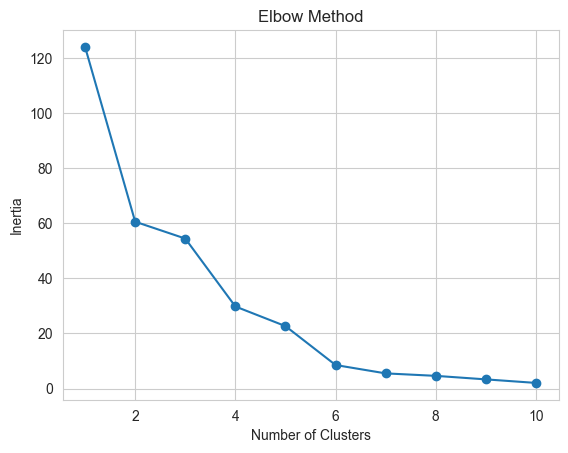

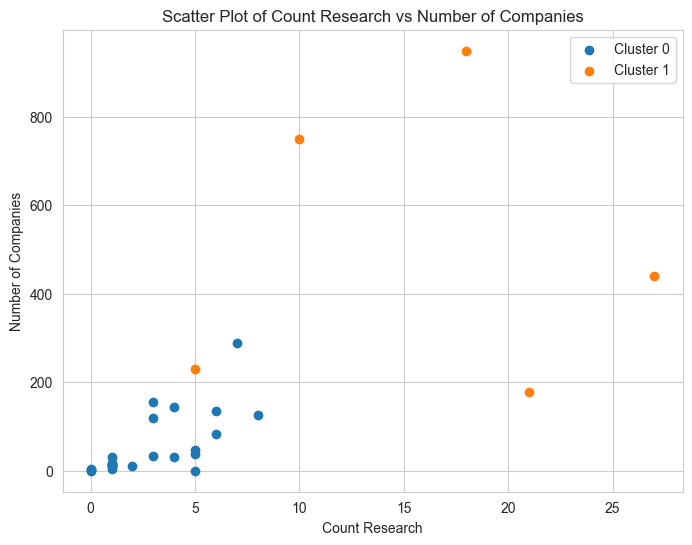

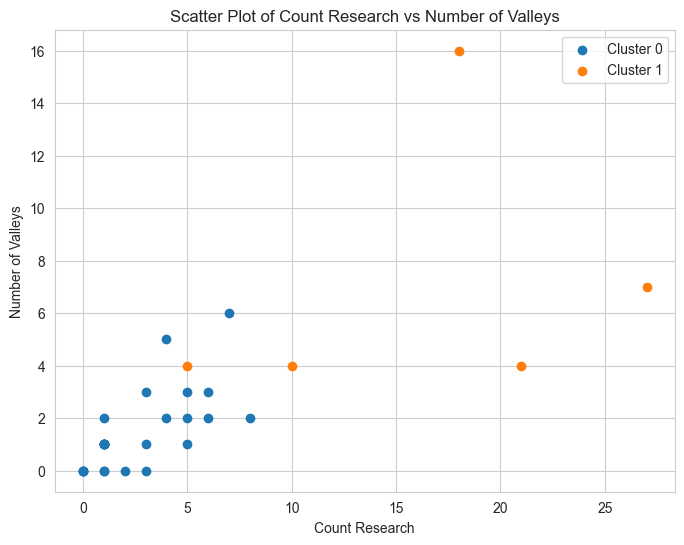

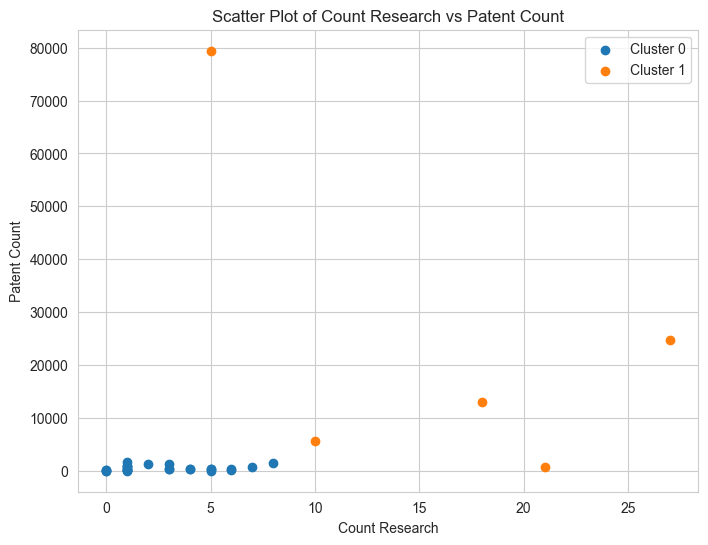

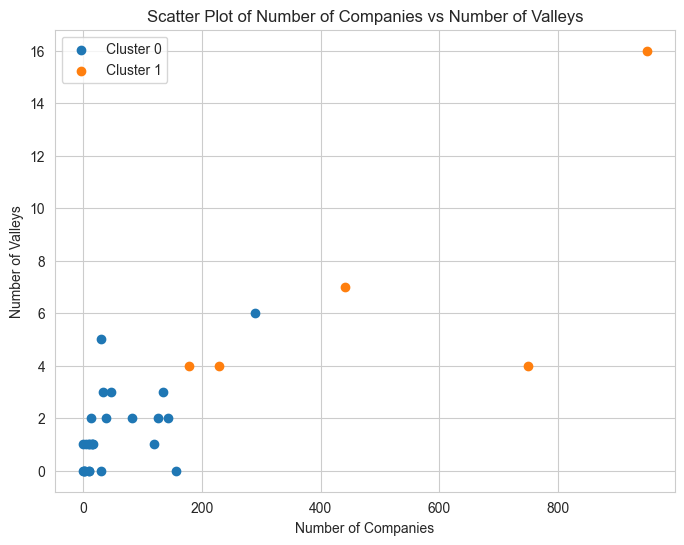

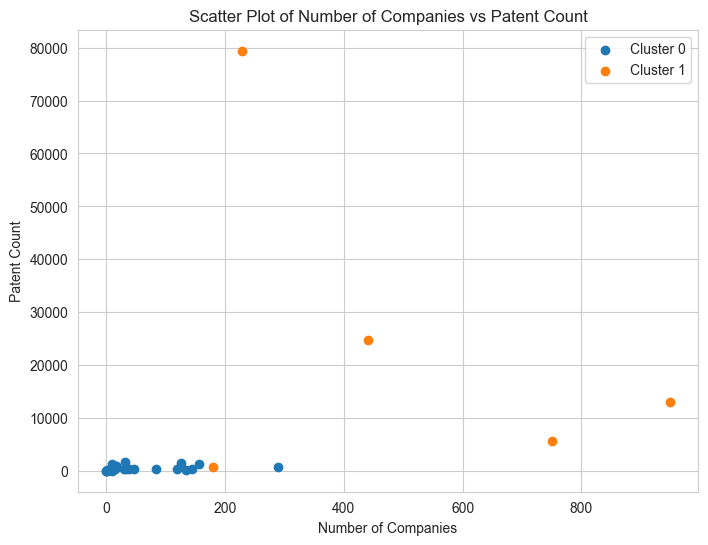

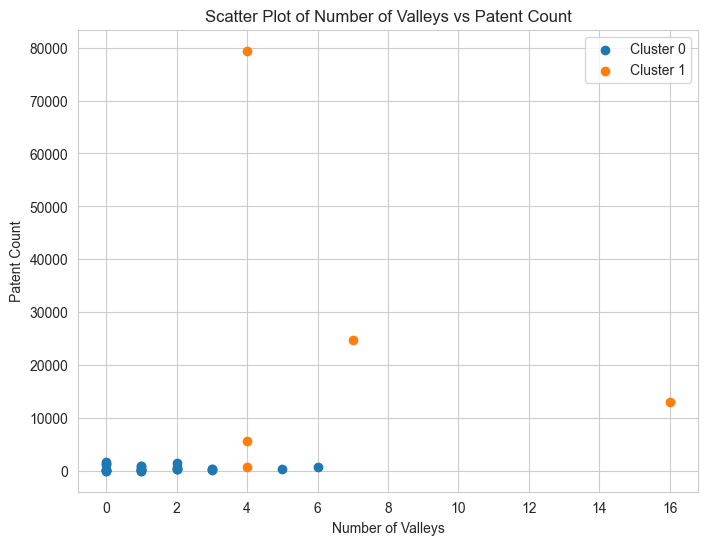

In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant variables for clustering
variables_of_interest = ["Count Research", "Number of Companies", "Number of Valleys", "Patent Count"]

# Normalize the selected variables
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_df_new[variables_of_interest])

# Determine the optimal number of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method to visualize inertia
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the elbow method, choose the optimal number of clusters
optimal_n_clusters = 2

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
merged_df_new['Cluster'] = clusters

# Visualize clusters using scatter plots (consider pairwise combinations of variables)
for i in range(len(variables_of_interest)):
    for j in range(i + 1, len(variables_of_interest)):
        plt.figure(figsize=(8, 6))
        for cluster_label in range(optimal_n_clusters):
            plt.scatter(merged_df_new[merged_df_new['Cluster'] == cluster_label][variables_of_interest[i]],
                        merged_df_new[merged_df_new['Cluster'] == cluster_label][variables_of_interest[j]],
                        label=f'Cluster {cluster_label}')
        plt.xlabel(variables_of_interest[i])
        plt.ylabel(variables_of_interest[j])
        plt.title(f'Scatter Plot of {variables_of_interest[i]} vs {variables_of_interest[j]}')
        plt.legend()
        plt.show()


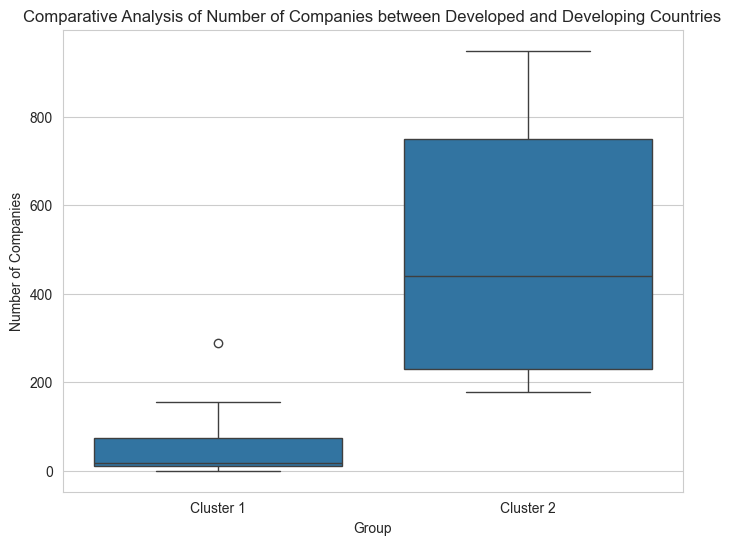

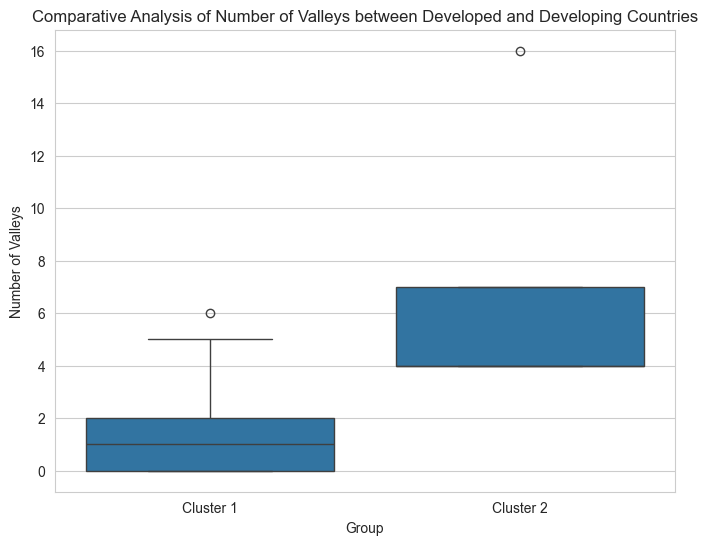

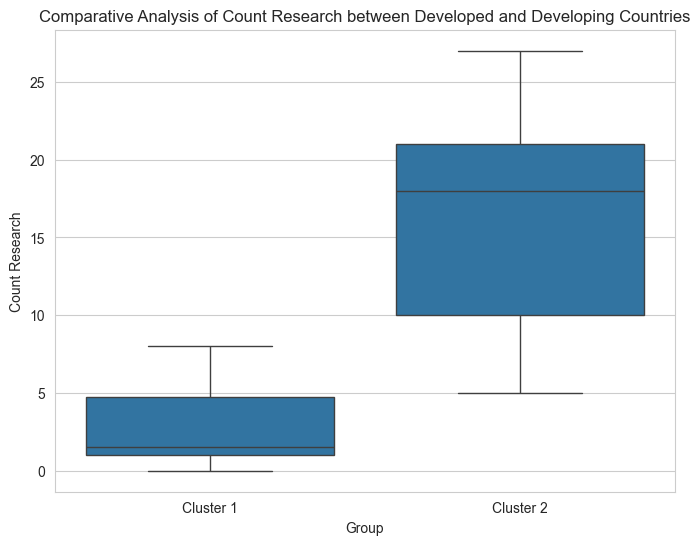

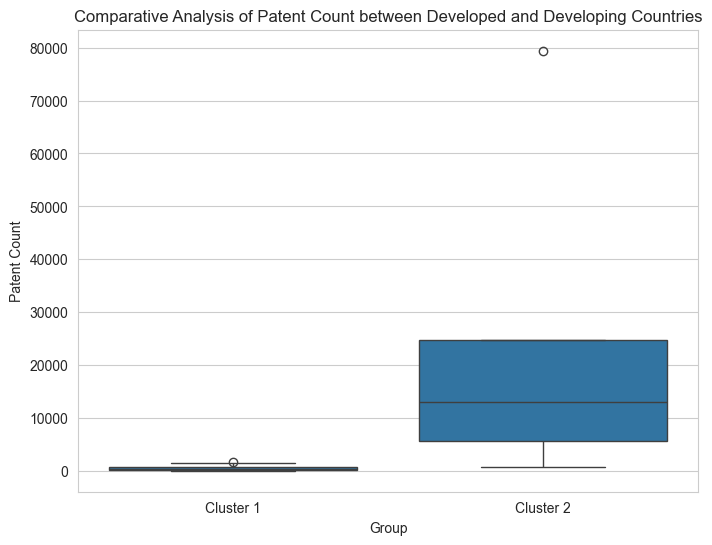

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant variables for comparison
variables_of_interest = ["Number of Companies", "Number of Valleys", "Count Research", "Patent Count"]

# Group countries into relevant categories or regions
# For simplicity, let's assume two groups: Developed and Developing countries
# You can define more sophisticated grouping criteria based on your specific context
merged_df_new['Group'] = 'Cluster 1'  # Initialize all countries as Developing
merged_df_new.loc[merged_df_new['Cluster'] > 0, 'Group'] = 'Cluster 2'  # Define threshold for Developed countries

# Plot comparative analysis results
for variable in variables_of_interest:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Group', y=variable, data=merged_df_new)
    plt.xlabel('Group')
    plt.ylabel(variable)
    plt.title(f'Comparative Analysis of {variable} between Developed and Developing Countries')
    plt.show()


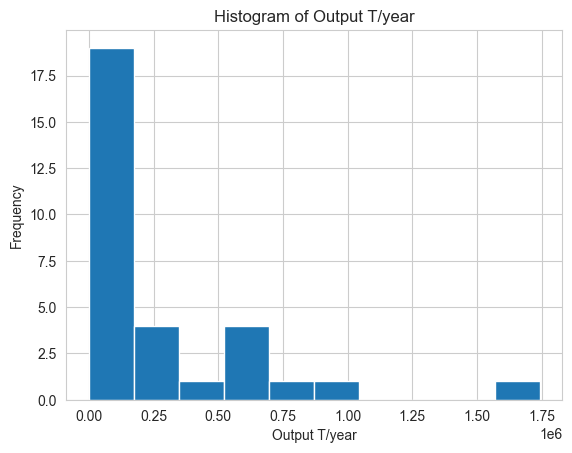

In [75]:
#Visuals
# Example of histogram
plt.hist(merged_df_new['Output T/year'], bins=10)
plt.xlabel('Output T/year')
plt.ylabel('Frequency')
plt.title('Histogram of Output T/year')
plt.show()

In [78]:
merged_df_new

,Country,Output T/year,Total consumption,Count Research,Patent Count,Number Stations,Value (€/kg),FCEV Fleet,2023,per_million,Worker,Number of Companies,Number of Valleys,Cluster,Group
0,Austria,1.154723e+05,1.161150e+05,4.0,250.0,5.0,31.368331,62.0,9104772.0,9.104772,1599.0,144.0,2.0,0,Cluster 1
1,Belgium,4.112296e+05,3.781651e+05,6.0,242.0,9.0,28.286734,110.0,11742796.0,11.742796,26342.0,83.0,2.0,0,Cluster 1
2,Bulgaria,1.211730e+05,1.211920e+05,2.0,1244.0,0.0,22.984392,0.0,6447710.0,6.447710,1049.0,10.0,0.0,0,Cluster 1
3,Croatia,6.231680e+04,6.233575e+04,1.0,85.0,0.0,29.727574,0.0,3850894.0,3.850894,355.0,10.0,0.0,0,Cluster 1
4,Cyprus,0.000000e+00,0.000000e+00,0.0,0.0,0.0,22.828040,0.0,920701.0,0.920701,0.0,0.0,0.0,0,Cluster 1
5,Czech Republic,1.038661e+05,1.041095e+05,1.0,1671.0,2.0,28.182995,12.0,10827529.0,10.827529,1957.0,31.0,0.0,0,Cluster 1
6,Denmark,2.495285e+04,2.528949e+04,5.0,390.0,6.0,30.300360,234.0,5932654.0,5.932654,3232.0,47.0,3.0,0,Cluster 1
7,Estonia,1.685887e+01,1.685887e+01,1.0,3.0,0.0,28.618730,2.0,1365884.0,1.365884,0.0,10.0,1.0,0,Cluster 1
8,Finland,1.764358e+05,1.763571e+05,5.0,351.0,0.0,27.929211,2.0,5563970.0,5.563970,3113.0,38.0,2.0,0,Cluster 1
9,France,5.528228e+05,5.497484e+05,10.0,5547.0,30.0,27.791140,863.0,68172977.0,68.172977,84110.0,750.0,4.0,1,Cluster 2


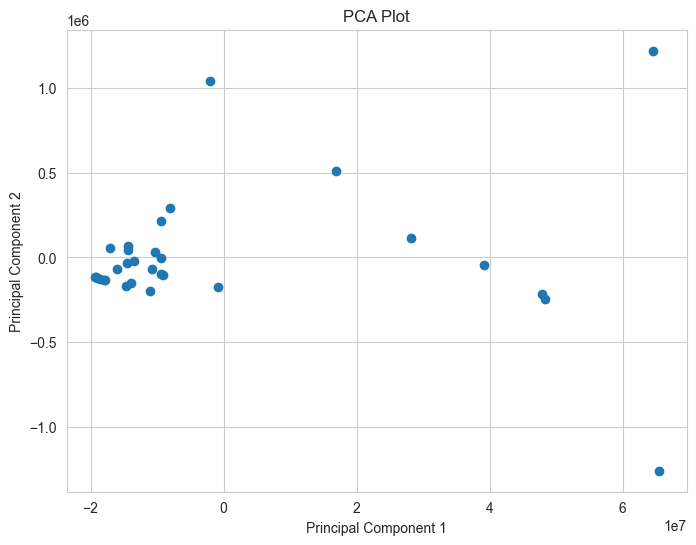

In [79]:
from sklearn.decomposition import PCA

# Select features for PCA
X = merged_df_new.drop(columns=['Country', "Cluster", "Group"])

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(X)

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()


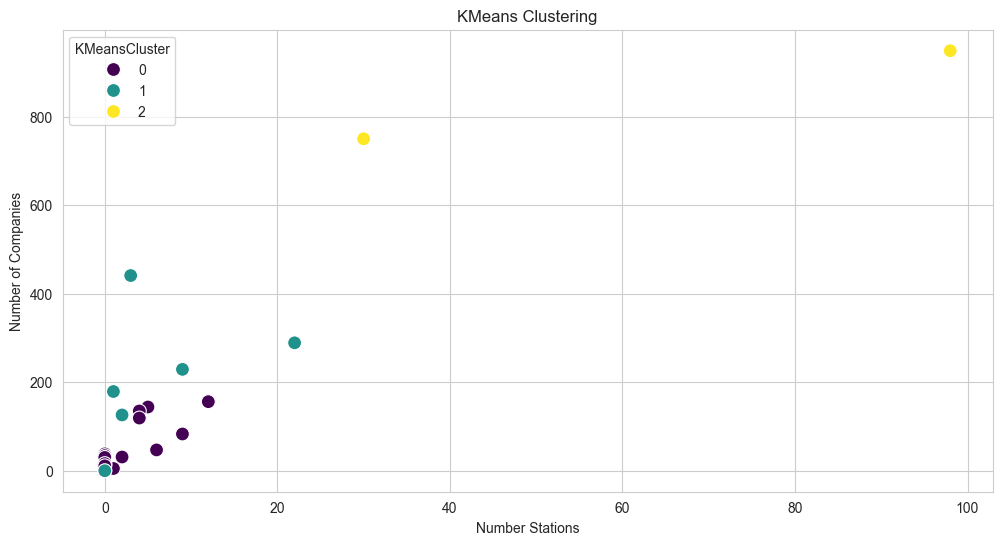

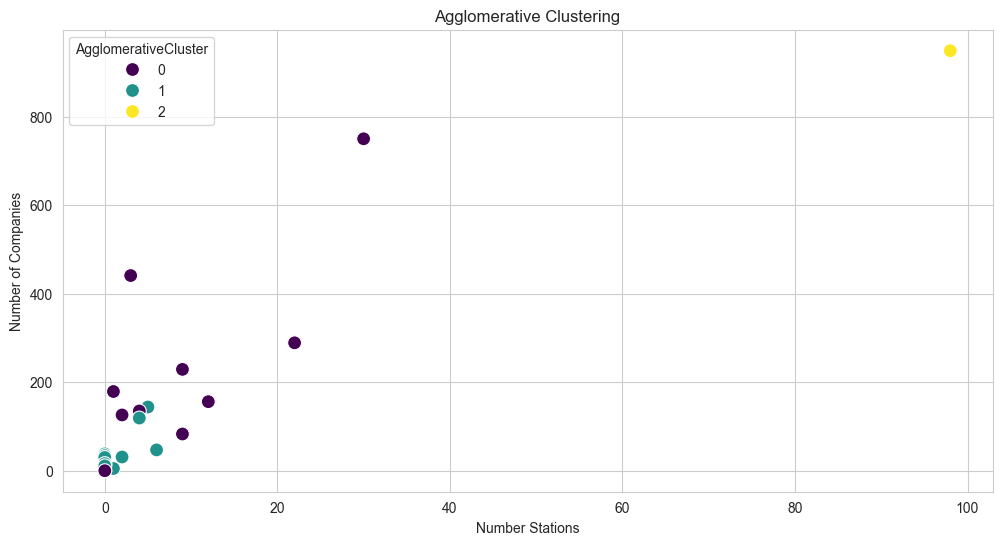

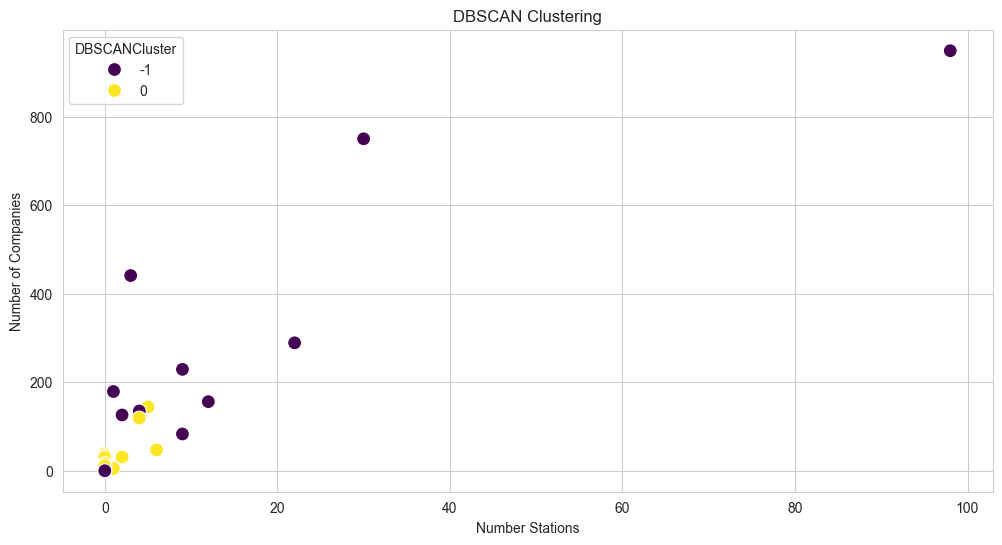

,Country,Output T/year,Total consumption,Count Research,Patent Count,Number Stations,Value (€/kg),FCEV Fleet,2023,per_million,Worker,Number of Companies,Number of Valleys,Cluster,Group,AgglomerativeCluster,DBSCANCluster,KMeansCluster
0,Austria,115472.344275,116115.020046,4.0,250.0,5.0,31.368331,62.0,9104772.0,9.104772,1599.0,144.0,2.0,1,Cluster 1,1,0,0
1,Belgium,411229.634627,378165.082916,6.0,242.0,9.0,28.286734,110.0,11742796.0,11.742796,26342.0,83.0,2.0,0,Cluster 1,0,-1,0
2,Bulgaria,121173.045548,121192.047801,2.0,1244.0,0.0,22.984392,0.0,6447710.0,6.447710,1049.0,10.0,0.0,1,Cluster 1,1,0,0
3,Croatia,62316.803067,62335.749942,1.0,85.0,0.0,29.727574,0.0,3850894.0,3.850894,355.0,10.0,0.0,1,Cluster 1,1,0,0
4,Cyprus,0.000000,0.000000,0.0,0.0,0.0,22.828040,0.0,920701.0,0.920701,0.0,0.0,0.0,1,Cluster 1,1,0,0


In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assume merged_df_new is the dataframe with your data
# Drop the 'Country' column for clustering
df = merged_df_new.drop(columns=['Country', "Cluster", "Group"])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
merged_df_new['AgglomerativeCluster'] = agg_cluster.fit_predict(df_scaled)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=2)
merged_df_new['DBSCANCluster'] = dbscan.fit_predict(df_scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_df_new['KMeansCluster'] = kmeans.fit_predict(df_scaled)

# Plot the clusters for KMeans
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df_new, x='Number Stations', y='Number of Companies', hue='KMeansCluster', palette='viridis', s=100)
plt.title('KMeans Clustering')
plt.show()

# Plot the clusters for Agglomerative Clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df_new, x='Number Stations', y='Number of Companies', hue='AgglomerativeCluster', palette='viridis', s=100)
plt.title('Agglomerative Clustering')
plt.show()

# Plot the clusters for DBSCAN
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df_new, x='Number Stations', y='Number of Companies', hue='DBSCANCluster', palette='viridis', s=100)
plt.title('DBSCAN Clustering')
plt.show()

# Display the dataframe with cluster assignments
merged_df_new.head()


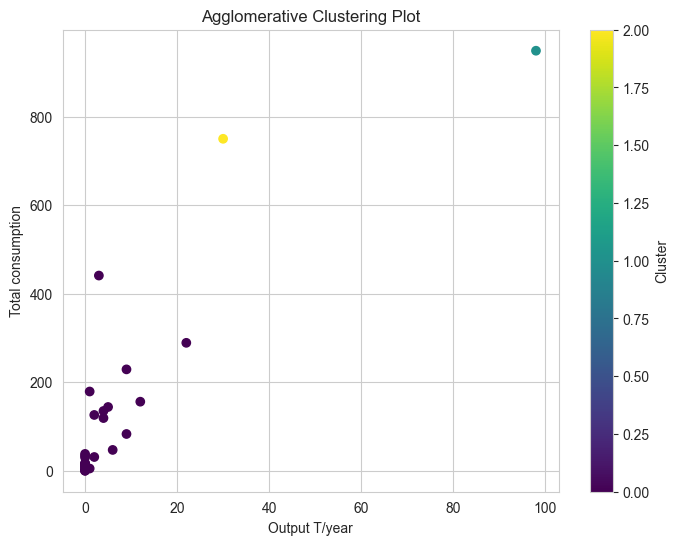

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

# Select features for clustering
X = merged_df_new[['Number Stations', 'Number of Companies']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
merged_df_new['Cluster'] = agg_clustering.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(merged_df_new['Number Stations'], merged_df_new['Number of Companies'], c=merged_df_new['Cluster'], cmap='viridis')
plt.xlabel('Output T/year')
plt.ylabel('Total consumption')
plt.title('Agglomerative Clustering Plot')
plt.colorbar(label='Cluster')
plt.show()


In [83]:
merged_df_new

,Country,Output T/year,Total consumption,Count Research,Patent Count,Number Stations,Value (€/kg),FCEV Fleet,2023,per_million,Worker,Number of Companies,Number of Valleys,Cluster,Group,AgglomerativeCluster,DBSCANCluster,KMeansCluster
0,Austria,1.154723e+05,1.161150e+05,4.0,250.0,5.0,31.368331,62.0,9104772.0,9.104772,1599.0,144.0,2.0,1,Cluster 1,2,0,0
1,Belgium,4.112296e+05,3.781651e+05,6.0,242.0,9.0,28.286734,110.0,11742796.0,11.742796,26342.0,83.0,2.0,0,Cluster 1,0,-1,0
2,Bulgaria,1.211730e+05,1.211920e+05,2.0,1244.0,0.0,22.984392,0.0,6447710.0,6.447710,1049.0,10.0,0.0,1,Cluster 1,2,0,0
3,Croatia,6.231680e+04,6.233575e+04,1.0,85.0,0.0,29.727574,0.0,3850894.0,3.850894,355.0,10.0,0.0,1,Cluster 1,2,0,0
4,Cyprus,0.000000e+00,0.000000e+00,0.0,0.0,0.0,22.828040,0.0,920701.0,0.920701,0.0,0.0,0.0,1,Cluster 1,2,0,0
5,Czech Republic,1.038661e+05,1.041095e+05,1.0,1671.0,2.0,28.182995,12.0,10827529.0,10.827529,1957.0,31.0,0.0,1,Cluster 1,2,0,0
6,Denmark,2.495285e+04,2.528949e+04,5.0,390.0,6.0,30.300360,234.0,5932654.0,5.932654,3232.0,47.0,3.0,1,Cluster 1,2,0,0
7,Estonia,1.685887e+01,1.685887e+01,1.0,3.0,0.0,28.618730,2.0,1365884.0,1.365884,0.0,10.0,1.0,1,Cluster 1,2,0,0
8,Finland,1.764358e+05,1.763571e+05,5.0,351.0,0.0,27.929211,2.0,5563970.0,5.563970,3113.0,38.0,2.0,1,Cluster 1,2,0,0
9,France,5.528228e+05,5.497484e+05,10.0,5547.0,30.0,27.791140,863.0,68172977.0,68.172977,84110.0,750.0,4.0,0,Cluster 2,0,-1,2


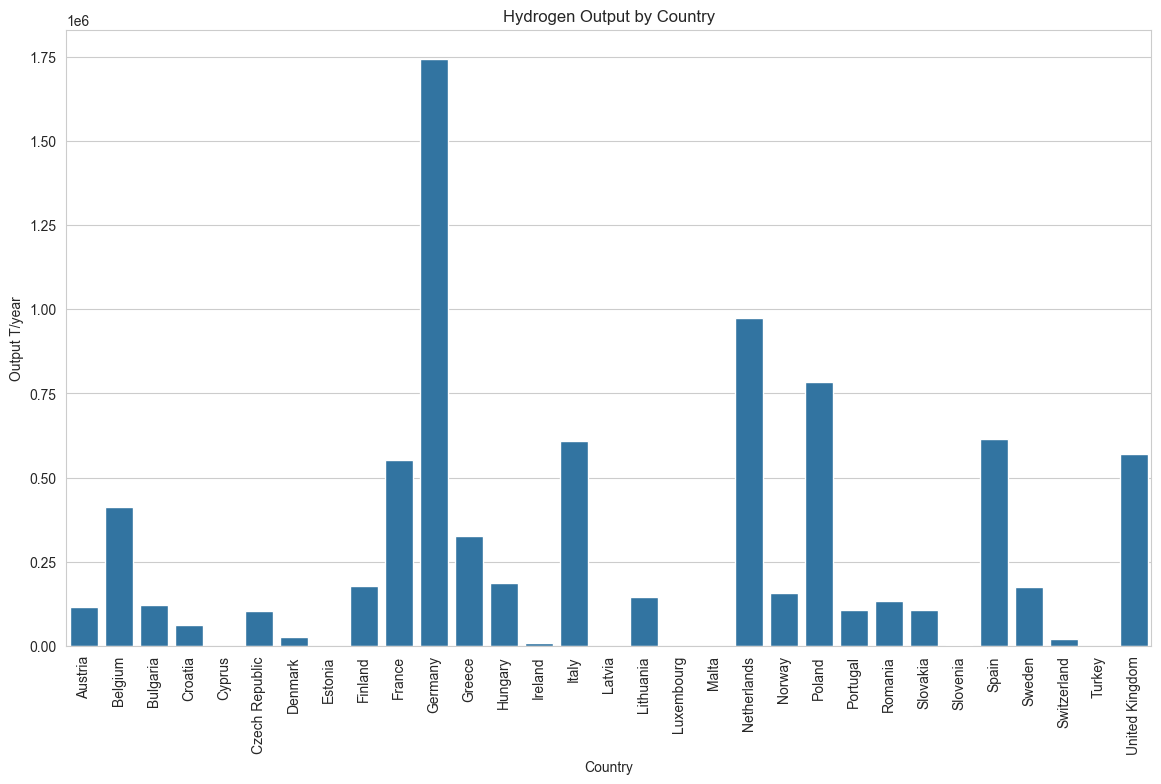

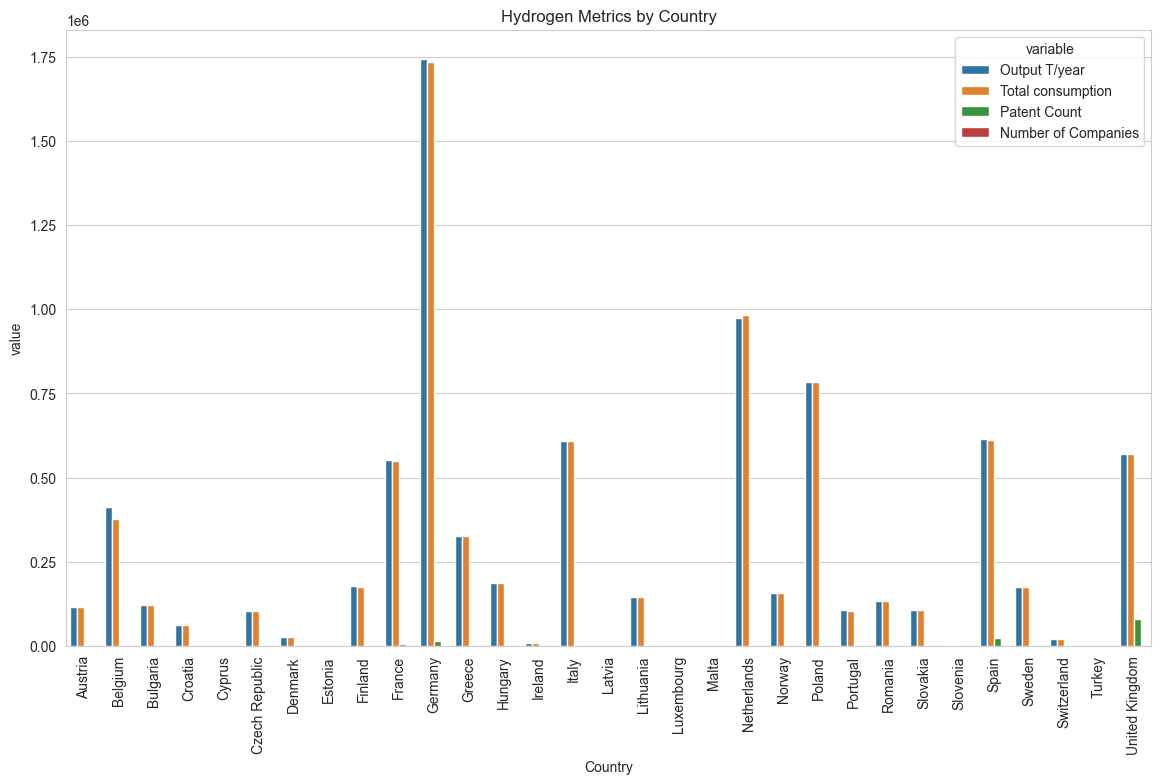

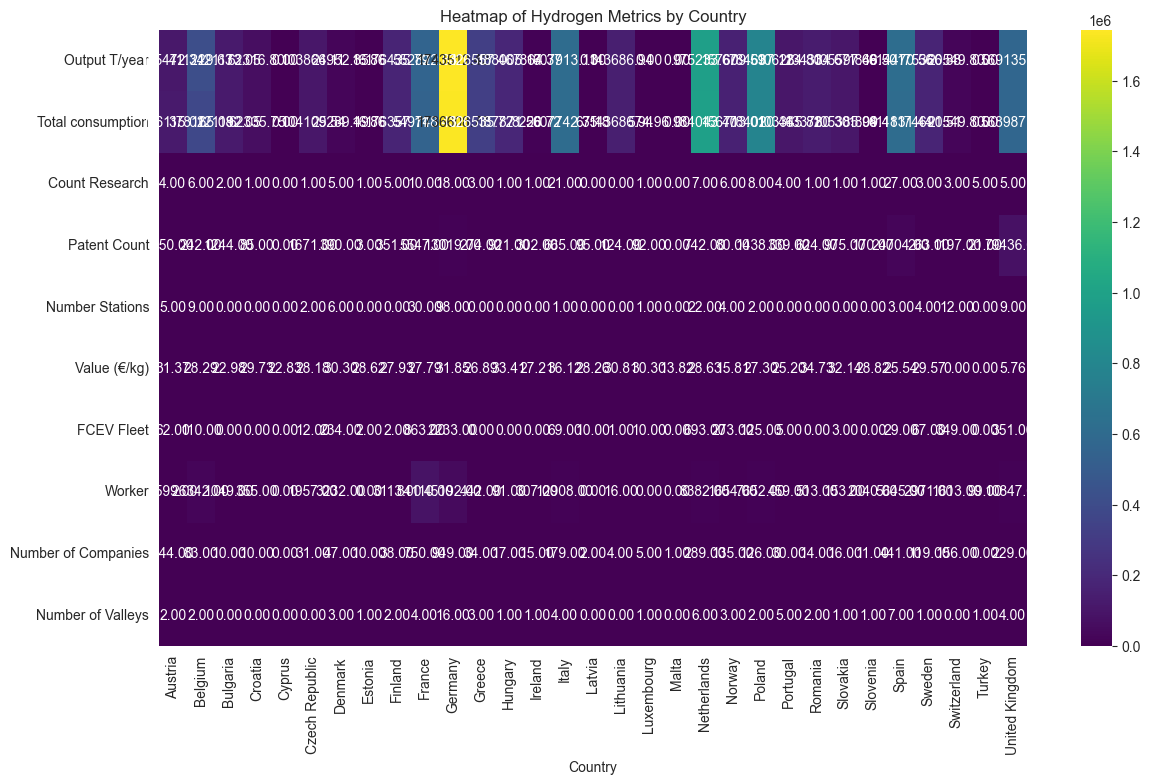

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Sample data (assuming merged_df_new is already defined)
data = df.copy()
data = data.drop(columns=['2023', 'per_million'])
# Bar Plot for Direct Comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Output T/year', data=data)
plt.title('Hydrogen Output by Country')
plt.xticks(rotation=90)
plt.show()

# Stacked Bar Chart for Multiple Metrics
data_melted = pd.melt(data, id_vars=['Country'], value_vars=['Output T/year', 'Total consumption', 'Patent Count', 'Number of Companies'])
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='value', hue='variable', data=data_melted)
plt.title('Hydrogen Metrics by Country')
plt.xticks(rotation=90)
plt.show()

# Heatmap for Metrics
plt.figure(figsize=(14, 8))
sns.heatmap(data.set_index('Country').transpose(), cmap='viridis', annot=True, fmt='.2f')
plt.title('Heatmap of Hydrogen Metrics by Country')
plt.show()

# Radar Chart (Spider Plot)
import plotly.graph_objects as go

categories = ['Output T/year', 'Total consumption', 'Patent Count', 'Number Stations', 'Value (€/kg)', 'FCEV Fleet', 'Worker', 'Number of Companies', 'Number of Valleys']

fig = go.Figure()

for i in range(len(data)):
    fig.add_trace(go.Scatterpolar(
        r=[data.loc[i, cat] for cat in categories],
        theta=categories,
        fill='toself',
        name=data.loc[i, 'Country']
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, data[categories].max().max()]
        )),
    showlegend=True,
    title='Radar Chart of Hydrogen Metrics by Country'
)

fig.show()

# Choropleth Map for Geographic Data Visualization
fig = px.choropleth(data,
                    locations='Country',
                    locationmode='country names',
                    color='Output T/year',
                    hover_name='Country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Hydrogen Output by Country')

fig.show()
